# Working with Multi-Dimensional data

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
    <b>Multidimensional data</b><br><br>
    <a href="https://doc.arcgis.com/en/imagery/workflows/resources/managing-multidimensional-data.htm">
        <b>refer:</b>https://doc.arcgis.com/en/imagery/workflows/resources/managing-multidimensional-data.htm
    </a><br><br>
    <p>
        Multidimensional data represents geophysical, environmental, climatological, or atmospheric phenomena that occur over space (two dimensional), time (another dimension), or height or depth (two more dimensions). These datasets can also contain multiple variables, such as precipitation, soil moisture, and temperature. Multidimensional raster data can be generated from satellite observations captured at different time intervals, or it can be generated from numerical models that aggregate, interpolate, or simulate data from other sources.

Datasets such as these are valuable for atmospheric, oceanographic, climate, and earth sciences. With multidimensional data, researchers can analyze changes through time, such as deforestation, and changes through space, such as changes in ocean salinity with depth. However, given the complex data structure, managing these datasets to analyze or visualize them quickly and effectively can be challenging. These datasets are also often very large, stored in a cloud environment, and frequently updated, introducing additional complications.
    </p>
</div>

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
    <b>Common Multi-Dimensional data formats</b><br><br>
    <p>NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data. The Unidata Program Center supports and maintains netCDF programming interfaces for C, C++, Java, and Fortran. Programming interfaces are also available for Python, IDL, MATLAB, R, Ruby, and Perl.</p><br>
    <b>Data in netCDF format is:</b>
    
<li>Self-Describing. A netCDF file includes information about the data it contains.
<li>Portable. A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
<li>Scalable. Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
<li>Appendable. Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
<li>Sharable. One writer and multiple readers may simultaneously access the same netCDF file.
<li>Archivable. Access to all earlier forms of netCDF data will be supported by current and future versions of the software.
</div>

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
    <b>Indian Rainfall Data:</b><br><br>
    <a href="https://www.imdpune.gov.in/cmpg/Griddata/Rainfall_25_NetCDF.html">
        <b>refer:</b>https://www.imdpune.gov.in/cmpg/Griddata/Rainfall_25_NetCDF.html
    </a><br><br>
    <p>
       IMD New High Spatial Resolution (0.25X0.25 degree) Long Period (1901-2022) Daily Gridded Rainfall Data Set Over India. This data product is a very high spatial resolution daily gridded rainfall data (0.25 x 0.25 degree). The unit of rainfall is in millimeter (mm). Data available for 122 years, 1901 to 2022. Data is arranged in 135x129 grid points. The first data in the record is at 6.5N & 66.5E, the second is at 6.5N & 66.75E, and so on. The last data record corresponds to 38.5N & 100.0E. The yearly data file consists of 365/366 records corresponding to non leap/ leap years.
    </p>
</div>

In [1]:
# Installing IMD library to download the data
!pip install imdlib

In [2]:
# Downloading the IMD Data
# Refer: https://saswatanandi.github.io/softwares/imdlib/
import imdlib as imd

# Downloading 10 years of rainfall data for India
start_yr = 2011
end_yr = 2020
variable = 'rain' # other options are ('tmin'/ 'tmax')
imd.get_data(variable, start_yr, end_yr, fn_format='yearwise')

Downloading: rain for year 2011
Downloading: rain for year 2012
Downloading: rain for year 2013
Downloading: rain for year 2014
Downloading: rain for year 2015
Downloading: rain for year 2016
Downloading: rain for year 2017
Downloading: rain for year 2018
Downloading: rain for year 2019
Downloading: rain for year 2020
Download Successful !!!


**Reading IMD datasets**

One major purposes of IMDLIB is to process IMD’s gridded dataset. The original data is available in grd file format. IMDLIB can read grd file in xarray style and will create a IMD class objetct.

In [3]:
start_yr = 2011
end_yr = 2020
variable = 'rain' # other options are ('tmin'/ 'tmax')
file_dir = (r'rain') #Path to read the files
data = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)
data

In [4]:
# Converting to xarray

ds = data.get_xarray()
ds 

<xarray.Dataset>
Dimensions:  (time: 3653, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Data variables:
    rain     (time, lat, lon) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-02-13 18:02:22.871361 Python
    references:   
    comment:      
    crs:          epsg:4326

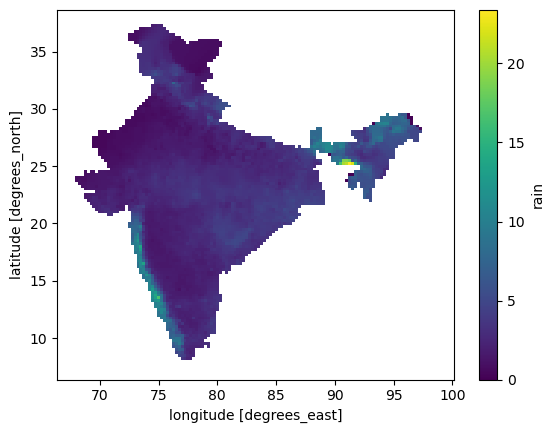

In [5]:
# Plotting dialy mean rainfall
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()

In [6]:
# Convert to netcdf file
import os
os.getcwd()

'C:\\Users\\wwwsu\\Pratical_Class'

In [7]:
file_name = 'IMD_rainfall_2011_2020.nc'
out_dir = os.getcwd()
data.to_netcdf(file_name, out_dir)

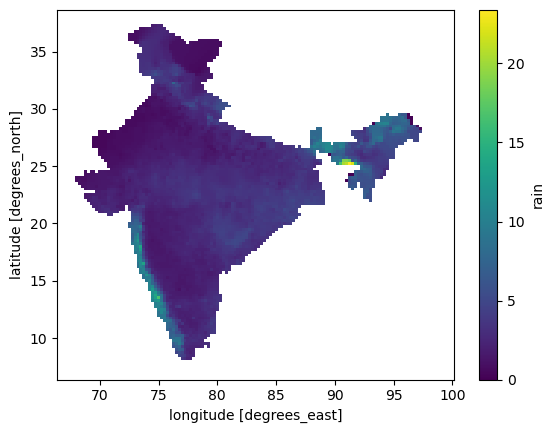

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the xarray dataset
ds = xr.open_dataset(out_dir + '/' +file_name)
ds = ds.where(ds['rain'] != -999.)
ds['rain'].mean('time').plot()
mean = ds['rain'].mean('time')

In [9]:
ds

<xarray.Dataset>
Dimensions:  (time: 3653, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Data variables:
    rain     (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-02-13 18:02:24.386875 Python
    references:   
    comment:      
    crs:          epsg:4326

In [10]:
ds.rain

<xarray.DataArray 'rain' (time: 3653, lat: 129, lon: 135)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Attributes:
    units:      mm/day
    long_name:  Rainfall

In [11]:
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 3653, 'lat': 129, 'lon': 135})

In [12]:
ds.attrs

{'Conventions': 'CF-1.7',
 'title': 'IMD gridded data',
 'source': 'https://imdpune.gov.in/',
 'history': '2024-02-13 18:02:24.386875 Python',
 'references': '',
 'comment': '',
 'crs': 'epsg:4326'}

In [13]:
import cartopy.crs as ccrs

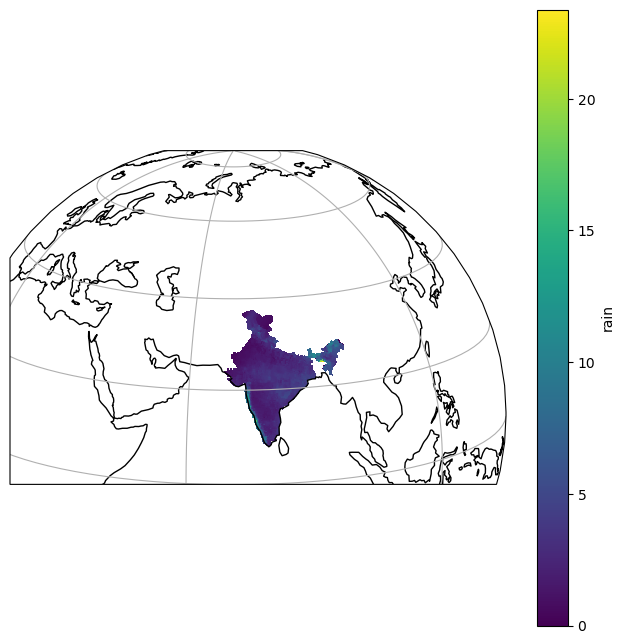

In [14]:
f = plt.figure(figsize=(8, 8))
# Define the map projection *on which* you want to plot
#ax = plt.axes(projection=ccrs.Orthographic())
ax = plt.axes(projection=ccrs.Orthographic(70, 15))# 70 = central longitude 15 = central latitude
# Settingup extent
ax.set_extent([180, 15, 0, 90])
# ax is an empty plot. We now plot the variable rain  in ax
mean.plot(ax=ax, transform=ccrs.PlateCarree())
# Add gridlines and coastlines to the plot
ax.coastlines(); ax.gridlines(); 